In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv("salary.csv")

In [3]:
df

,Unnamed: 0,age,Workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,1114,34,Private,290763,HS-grad,9,Divorced,Handlers-cleaners,Own-child,White,Female,0,0,40,United-States,0
1028,1116,36,Private,51100,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
1029,1117,41,Private,227644,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,50,United-States,0
1030,1118,58,Local-gov,205267,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,40,United-States,1


In [4]:
df.drop(["Unnamed: 0"],axis=1,inplace=True)

In [5]:
df

,age,Workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,34,Private,290763,HS-grad,9,Divorced,Handlers-cleaners,Own-child,White,Female,0,0,40,United-States,0
1028,36,Private,51100,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
1029,41,Private,227644,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,50,United-States,0
1030,58,Local-gov,205267,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,40,United-States,1


In [6]:
df.insert(0, 'ID', range(1, 1 + len(df)))
df.set_index("ID",inplace=True)

In [7]:
df

,age,Workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
ID,,,,,,,,,,,,,,,
1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
5,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,34,Private,290763,HS-grad,9,Divorced,Handlers-cleaners,Own-child,White,Female,0,0,40,United-States,0
1029,36,Private,51100,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
1030,41,Private,227644,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,50,United-States,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1032 entries, 1 to 1032
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             1032 non-null   int64 
 1   Workclass       1032 non-null   object
 2   fnlwgt          1032 non-null   int64 
 3   education       1032 non-null   object
 4   education-num   1032 non-null   int64 
 5   marital-status  1032 non-null   object
 6   occupation      1032 non-null   object
 7   relationship    1032 non-null   object
 8   race            1032 non-null   object
 9   sex             1032 non-null   object
 10  capital-gain    1032 non-null   int64 
 11  capital-loss    1032 non-null   int64 
 12  hours-per-week  1032 non-null   int64 
 13  native-country  1032 non-null   object
 14  Income          1032 non-null   int64 
dtypes: int64(7), object(8)
memory usage: 129.0+ KB


In [9]:
df.isnull().sum()

age               0
Workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

In [10]:
df_num=df.select_dtypes(['int64','float64'])

In [11]:
df_cat=df.select_dtypes(['object'])

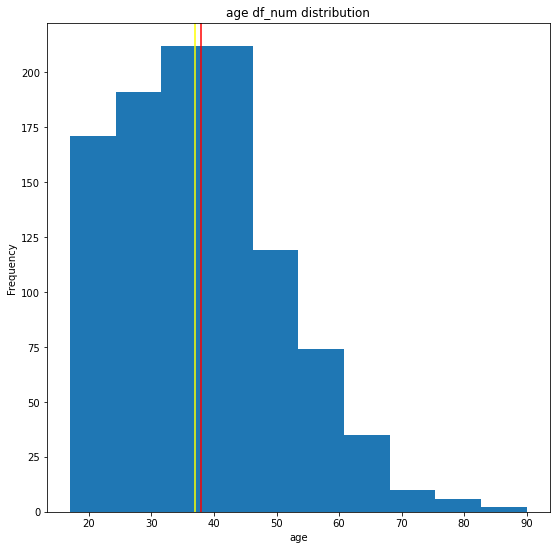

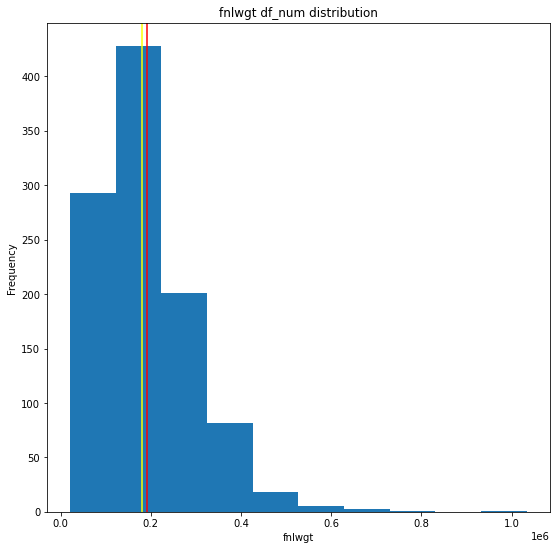

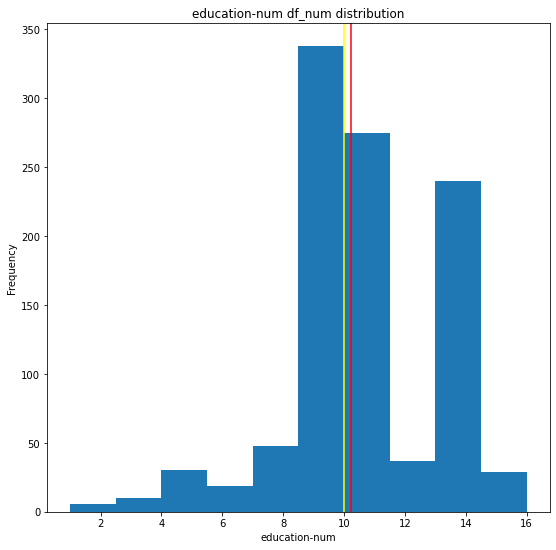

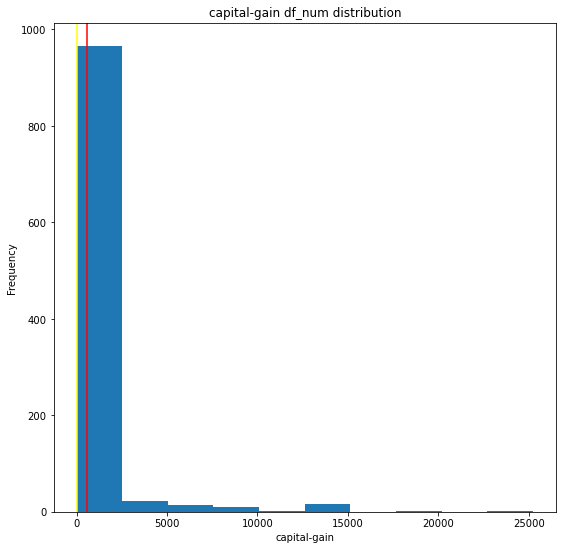

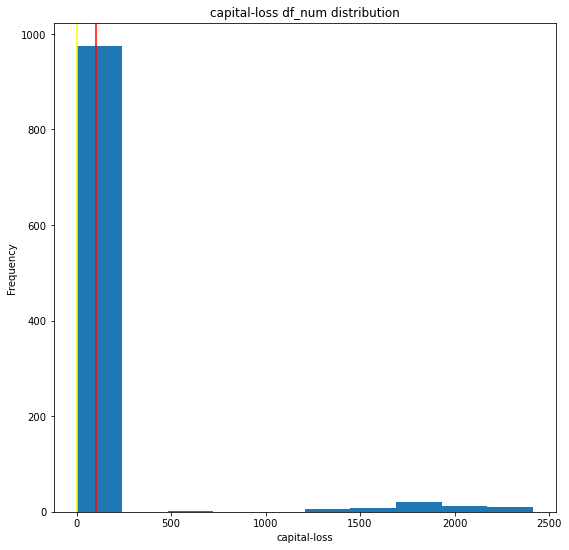

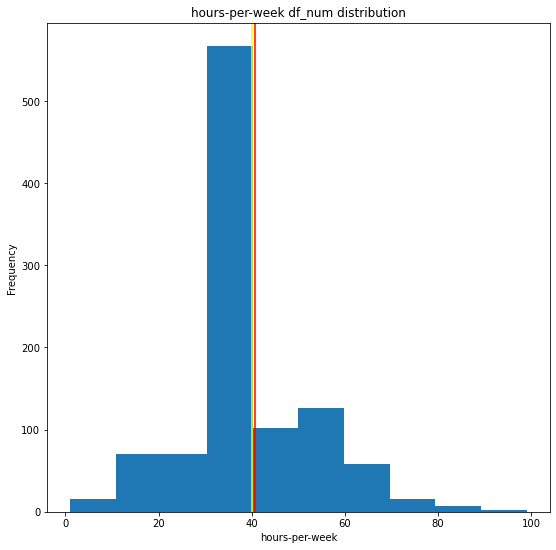

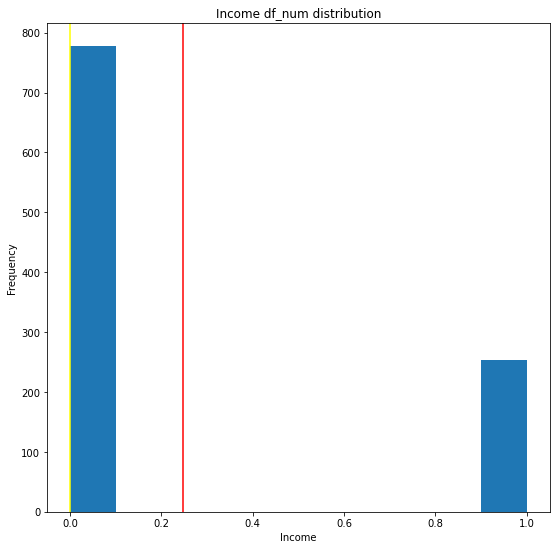

In [12]:
# univariate normal distribution data analysis 
for i in df_num:
    plt.figure(figsize=(9,9))
    plt.hist(df[i],bins=10)
    plt.title("{} df_num distribution".format(i))
    plt.axvline(df[i].mean(),color="red")
    plt.axvline(df[i].median(),color="yellow")
    plt.ylabel("Frequency")
    plt.xlabel(i)
    plt.show()

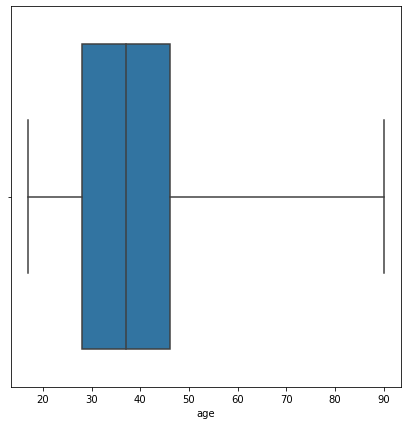

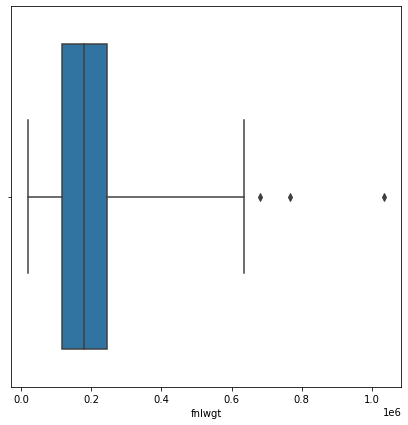

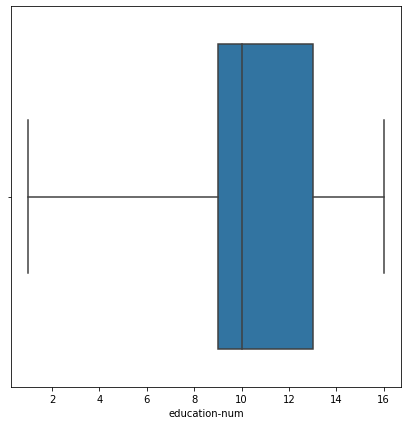

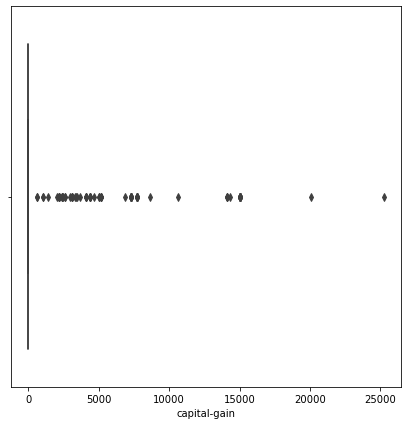

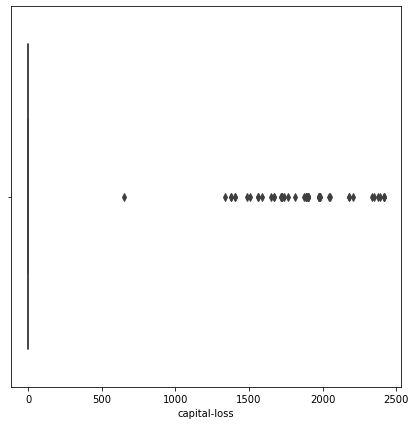

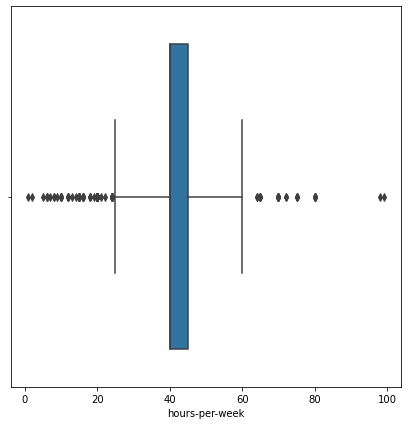

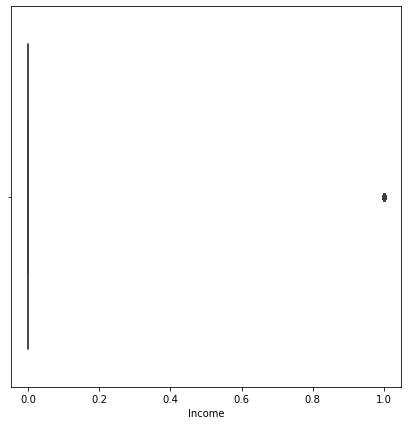

In [13]:
for i in df_num:
    plt.figure(figsize=(7,7))
    sns.boxplot(data=df_num,x=i,whis=3)
    # upper whisker = q3+1.5*IQR
    # lower whisker = q1 - 1.5*IQR 
    # boxplot will calculate upper whisker and lower whisker by it's own and the nit will plot the box
    plt.show()

In [14]:
df_num.shape

(1032, 7)

In [15]:
# fnlwgt Column Outlier Treatment 
q1=np.quantile(df_num["fnlwgt"],0.25)
q3=np.quantile(df_num["fnlwgt"],0.75)
iqr=q3-q1
print("Quantile1 for fnlwgt is => ",q1)
print("Quantile3 for fnlwgt is => ",q3)
print("IQR for fnlwgt column is => ",iqr)
#as we know we have higher extream values so no need to calculate lower whisker will only go for upper whisker 
up_whs=q3+3*iqr
print("upper whisker with 3 penalty is => ",up_whs)

# accept all those records which come below given whisker values
df_num=df_num[df_num["fnlwgt"]<up_whs]

Quantile1 for fnlwgt is =>  115579.25
Quantile3 for fnlwgt is =>  246193.25
IQR for fnlwgt column is =>  130614.0
upper whisker with 3 penalty is =>  638035.25


In [16]:
df_num.shape

(1029, 7)

In [18]:
# hours-per-week Column Outlier Treatment 
q1=np.quantile(df_num["hours-per-week"],0.25)
q3=np.quantile(df_num["hours-per-week"],0.75)
iqr=q3-q1
print("Quantile1 for hours-per-week is => ",q1)
print("Quantile3 for hours-per-week is => ",q3)
print("IQR for hours-per-week column is => ",iqr)
#as we know we have higher extream values so no need to calculate lower whisker will only go for upper whisker 
up_whs=q3+3*iqr
print("upper whisker with 3 penalty is => ",up_whs)

# accept all those records which come below given whisker values
df_num=df_num[df_num["hours-per-week"]<up_whs]

Quantile1 for hours-per-week is =>  40.0
Quantile3 for hours-per-week is =>  45.0
IQR for hours-per-week column is =>  5.0
upper whisker with 3 penalty is =>  60.0


In [19]:
df_num.shape

(947, 7)

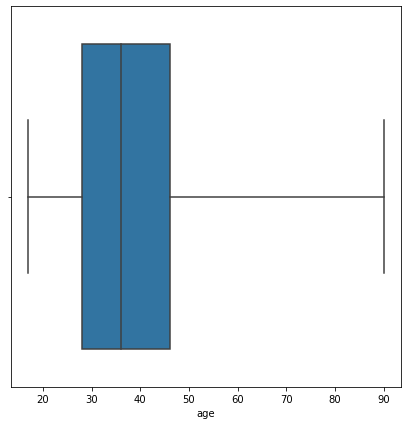

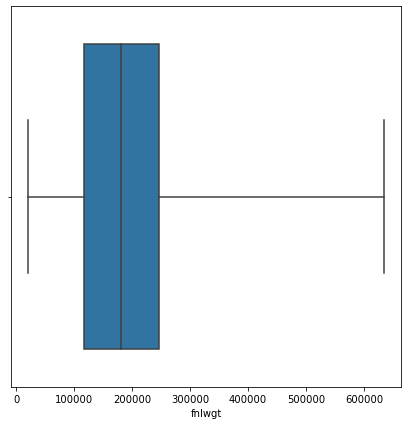

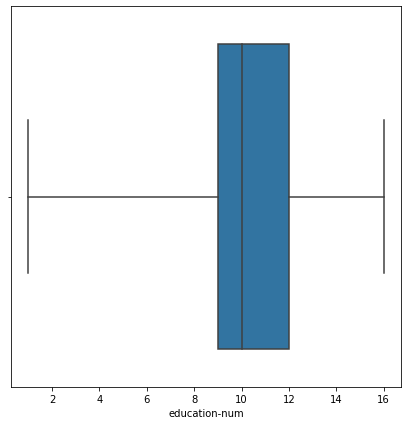

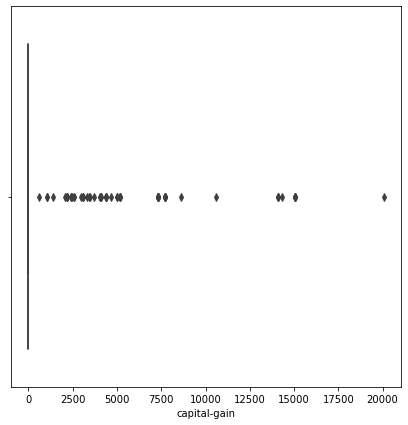

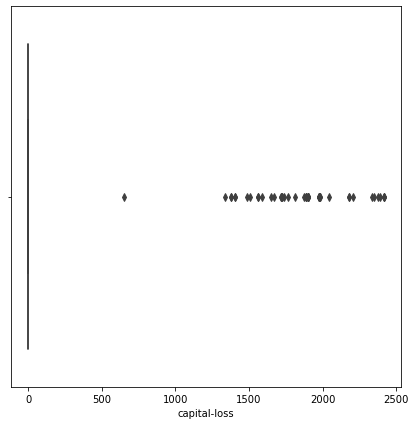

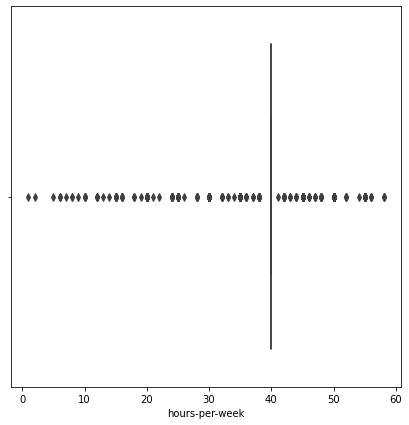

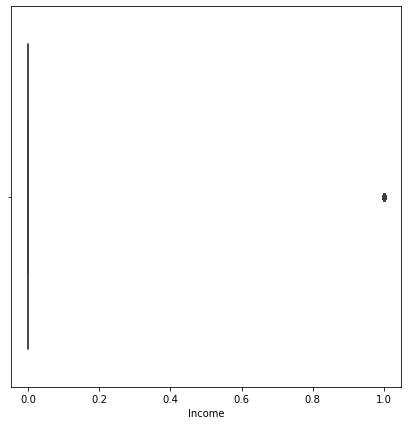

In [20]:
for i in df_num:
    plt.figure(figsize=(7,7))
    sns.boxplot(data=df_num,x=i,whis=3)
    # upper whisker = q3+1.5*IQR
    # lower whisker = q1 - 1.5*IQR 
    # boxplot will calculate upper whisker and lower whisker by it's own and the nit will plot the box
    plt.show()

In [21]:
from scipy.stats import skew

In [22]:
# Skew = 3 * (Mean – Median) / Standard Deviation.
for i in df_num:
    print(i,skew(df_num[i]))

#data skewness > -1 and < 1 that means data is normally distributed 

age 0.6409551961016726
fnlwgt 0.8320791831866718
education-num -0.40490150460445085
capital-gain 5.525935124662138
capital-loss 4.257521244505201
hours-per-week -1.1872215483818498
Income 1.274764719101602


age 0.6409551961016726


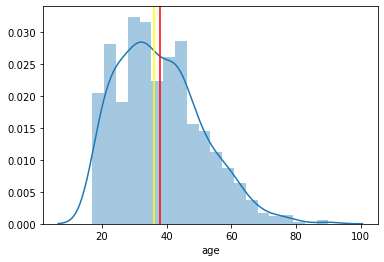

fnlwgt 0.8320791831866718


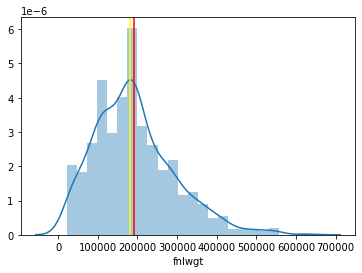

education-num -0.40490150460445085


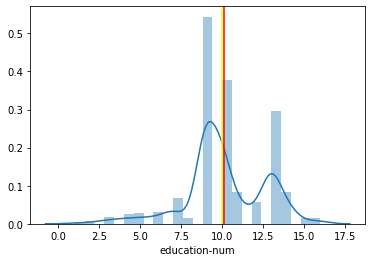

capital-gain 5.525935124662138


C:\Users\swapn\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


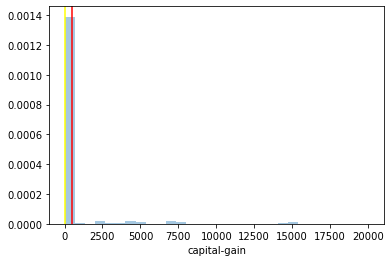

capital-loss 4.257521244505201


C:\Users\swapn\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


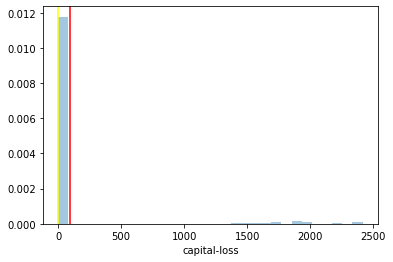

hours-per-week -1.1872215483818498


C:\Users\swapn\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


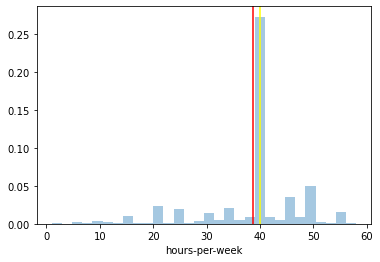

Income 1.274764719101602


C:\Users\swapn\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


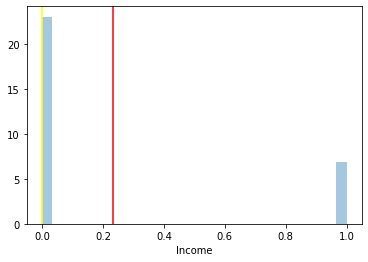

In [23]:
for col in df_num:
    print(col,skew(df_num[col]))
    plt.figure()
    sns.distplot(df_num[col])
    plt.axvline(df_num[col].mean(),color="red")
    plt.axvline(df_num[col].median(),color="yellow")
    plt.show()

In [24]:
# the columns which skewness values is >=1 and <= -1 those columns skewness we will reduce 
df_num_sqrt=df_num.copy()
for col in df_num_sqrt:
    if skew(df_num_sqrt[col]) >=1 or skew(df_num_sqrt[col])<=-1:
        df_num_sqrt[col]=np.sqrt(df_num_sqrt[col])

In [25]:
# Skew = 3 * (Mean – Median) / Standard Deviation.
for i in df_num:
    print(i,skew(df_num[i]))

#data skewness > -1 and < 1 that means data is normally distributed 

age 0.6409551961016726
fnlwgt 0.8320791831866718
education-num -0.40490150460445085
capital-gain 5.525935124662138
capital-loss 4.257521244505201
hours-per-week -1.1872215483818498
Income 1.274764719101602


In [26]:
df_num_minmaxscale=df_num.copy()

In [27]:
from sklearn.preprocessing  import MinMaxScaler
scaler=MinMaxScaler()

# it always return series but i need dataframe 
# house_num_minmaxscale =scaler.fit_transform(house_num_minmaxscale)
# dataframe 
df_num_minmaxscale = pd.DataFrame(scaler.fit_transform(df_num_minmaxscale.values),
                                     columns=df_num_minmaxscale.columns,
                                     index=df_num_minmaxscale.index)

In [28]:
for i in df_num_minmaxscale:
    print(i,skew(df_num_minmaxscale[i]))

age 0.6409551961016721
fnlwgt 0.8320791831866726
education-num -0.4049015046044485
capital-gain 5.525935124662137
capital-loss 4.257521244505202
hours-per-week -1.18722154838185
Income 1.274764719101602


In [29]:
# 1) if we want to apply standered scaler than first remove outliers 
# if there is high outliers or low outliers we will not get standered or standered normal distribution data
# Standered scaler 
# newx=(x-mean)/sd
df_num_standered_scale=df_num.copy()
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_num_standered_scale = pd.DataFrame(scaler.fit_transform(df_num_standered_scale.values),
                                     columns=df_num_standered_scale.columns,
                                     index=df_num_standered_scale.index)


In [30]:
for i in df_num_standered_scale:
    print(i,skew(df_num_standered_scale[i]))

age 0.6409551961016724
fnlwgt 0.8320791831866718
education-num -0.40490150460445146
capital-gain 5.5259351246621335
capital-loss 4.257521244505201
hours-per-week -1.1872215483818513
Income 1.2747647191016023


In [31]:
from sklearn.preprocessing import LabelEncoder 

In [32]:
le=LabelEncoder()
for col in df_cat:
    df_cat[col]=le.fit_transform(df_cat[col])

<ipython-input-32-1880eb163952>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat[col]=le.fit_transform(df_cat[col])


In [33]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1032 entries, 1 to 1032
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Workclass       1032 non-null   int32
 1   education       1032 non-null   int32
 2   marital-status  1032 non-null   int32
 3   occupation      1032 non-null   int32
 4   relationship    1032 non-null   int32
 5   race            1032 non-null   int32
 6   sex             1032 non-null   int32
 7   native-country  1032 non-null   int32
dtypes: int32(8)
memory usage: 40.3 KB


In [39]:
df_new=pd.merge(df_num,df_cat,on="ID")

In [40]:
df_new

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,Income,Workclass,education,marital-status,occupation,relationship,race,sex,native-country
ID,,,,,,,,,,,,,,,
1,39,77516,13,2174,0,40,0,5,9,4,0,1,4,1,28
2,50,83311,13,0,0,13,0,4,9,2,3,0,4,1,28
3,38,215646,9,0,0,40,0,2,11,0,5,1,4,1,28
4,53,234721,7,0,0,40,0,2,1,2,5,0,2,1,28
5,28,338409,13,0,0,40,0,2,9,2,9,5,2,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,34,290763,9,0,0,40,0,2,11,0,5,3,4,0,28
1029,36,51100,10,0,0,40,0,2,15,2,2,0,4,1,28
1030,41,227644,9,0,0,50,0,2,11,2,13,0,4,1,28


# Chi2 Test

In [45]:
# separate feature in x and target in y 
x=df_new.drop(["Income"],axis=1) #features
y=df_new["Income"] #target

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.3)

In [43]:
lr=LinearRegression()
lr.fit(x_train,y_train)
#r2 score is printed just to understand 
print("Base line model r2 score => ",lr.score(x_test,y_test))

Base line model r2 score =>  0.2818285040294851


In [48]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [49]:
#chi2 will not allow null values feature if its plz give absolute or remove that feature 
chi=SelectKBest(score_func=chi2,k=9) # we told maximum 7 features & using chi2 test

In [50]:
# will select best 7 features and create x_train_f df with those features 
x_train_f=chi.fit_transform(x_train,y_train)

In [51]:
x_test_f=chi.transform(x_test)

In [52]:
# i want to known which columns it is considering for learning 
chi_featurs=chi.get_support()
chi_features=x.loc[:,chi_featurs].columns.tolist()
print(chi_features)

['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'marital-status', 'relationship', 'sex']


In [53]:
lin_chi=LinearRegression()
lin_chi.fit(x_train_f,y_train)
print("chi2 feature model accuracy r2 score=>",lin_chi.score(x_test_f,y_test))

chi2 feature model accuracy r2 score=> 0.27021256366396174


In [54]:
# create model with anova test 
from sklearn.feature_selection import f_regression # anova
anova=SelectKBest(score_func=f_regression,k=12)

In [55]:
x_train_f=anova.fit_transform(x_train,y_train)
x_test_f=anova.transform(x_test)
lin_anova=LinearRegression()
lin_anova.fit(x_train_f,y_train)
print("r2score with anova best k 12 features",lin_anova.score(x_test_f,y_test))

r2score with anova best k 12 features 0.2826955770346702


In [56]:
#list of feature support by anova
anova_support=anova.get_support()
anova_feature = x.loc[:,anova_support].columns.tolist()
print(anova_feature)

['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex']
